In [154]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

In [182]:
data = pd.read_csv('diabetes.csv')
# le = preprocessing.LabelEncoder()
# data = data.apply(le.fit_transform)

In [183]:
print(data.shape)

(25, 9)


In [184]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [187]:
feature_cols = ['Glucose', 'BloodPressure','Age']
predictors = data[feature_cols]
targets = data.Outcome

In [195]:
X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=0.3, random_state = 42)

In [196]:
# membuat objek klasifikasi decision tree
clf = DecisionTreeClassifier(criterion="entropy")

# train klasifikasi decision tree
clf = clf.fit(X_train,y_train)

# memprediksi respon uji dataset
y_pred = clf.predict(X_test)

In [197]:
# Model Accuracy, untuk menghitung berapa sering klasifikasinya benar
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.625


In [198]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

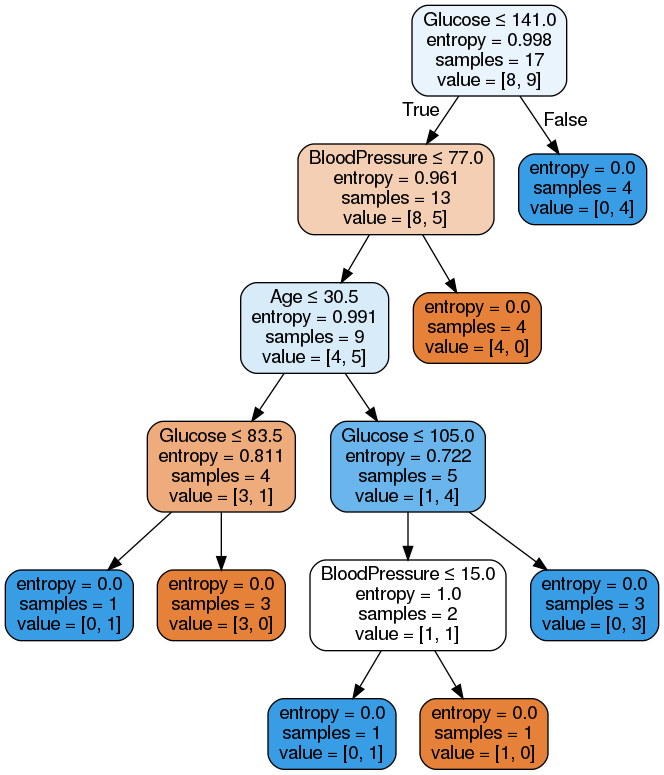

In [199]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())